# Visualisation des données

In [275]:
%reset -f

In [276]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt

from ast import literal_eval as l_eval
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.animation import FuncAnimation

In [277]:
%matplotlib nbagg

In [278]:
converters={'rho':l_eval, 'E_u':l_eval, 'F_u':l_eval, 'T_u':l_eval, 'E_d':l_eval, 'F_d':l_eval, 'T_d':l_eval, 'E_l':l_eval, 'F_l':l_eval, 'T_l':l_eval, 'E_r':l_eval, 'F_r':l_eval, 'T_r':l_eval}
df_simu = pd.read_csv("../../data/df_simu.csv", converters=converters)

N = df_simu.loc[0, 'N']
M = df_simu.loc[0, 'M']
step_count = df_simu.loc[0, 'step_count']

print("taille du maillage :", (N, M))
print("nombre d'itérations:", step_count)

df_simu

taille du maillage : (90, 90)
nombre d'itérations: 404


,x_min,x_max,y_min,y_max,N,M,c,a,C_v,CFL,...,T_u,E_d,F_d,T_d,E_l,F_l,T_l,E_r,F_r,T_r
0,0,1,0,1,90,90,299,0.01372,0.14361,0.5,...,"[[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,...","[[8.575, 8.575, 8.575, 8.575, 8.575, 8.575, 8....","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,...","[[8.575, 8.575, 8.575, 8.575, 8.575, 8.575, 8....","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,...","[[8.575, 8.575, 8.575, 8.575, 8.575, 8.575, 8....","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,..."


<IPython.core.display.Javascript object>


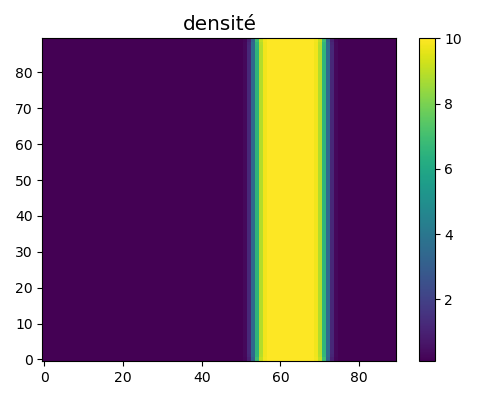

(min, max) rho = 0.1 10.0


In [279]:
# Plot de densite sous imshow
fig, ax = plt.subplots(1,1,figsize=(5,4))

# pour placer les indices entre 1 et N
def set_ticks(ax):
    spacing = 20
    ax.set_xticks(np.arange(0, N, spacing))
    ax.set_xticklabels(np.arange(1, N+1, spacing))
    ax.set_yticks(np.arange(0, M, spacing))
    ax.set_yticklabels(np.arange(1, M+1, spacing))

def min_max(mat, dim=2):
    mat_min = mat
    for i in range(dim-1, -1, -1):
        mat_min = np.nanmin(mat_min, axis=i)
        
    mat_max = mat
    for i in range(dim-1, -1, -1):
        mat_max = np.nanmax(mat_max, axis=i)

    return mat_min, mat_max

def plot_density(ax, index=0, cb=True):
    rho = np.array(df_simu.loc[0, 'rho'])
    rho_min, rho_max = min_max(rho)
    print("(min, max) rho =", rho_min, rho_max)

    img = ax.imshow(rho, origin='lower', cmap="viridis", interpolation='none', aspect='auto', vmin=rho_min, vmax=rho_max)
    if cb == True:
        fig.colorbar(img, ax=ax)
    # set_ticks(ax)
    ax.set_title("densité", size="x-large")

plot_density(ax, 0)
plt.tight_layout()

In [280]:
# Les donnees pour le plot des signaux
e = np.empty(shape=(step_count, M, N), dtype=float)
f = np.empty(shape=(step_count, M, N), dtype=float)
t = np.empty(shape=(step_count, M, N), dtype=float)
tr = np.empty(shape=(step_count, M, N), dtype=float)

for i in range(step_count):
    file_name = "../../data/anim/animation." + str(i) + ".csv";
    df = pd.read_csv(file_name)
    e[i] = np.array(df['E']).reshape(M, N)
    f[i] = np.sqrt(np.array(df['F_x'])**2 + np.array(df['F_y'])**2).reshape(M, N)
    t[i] = np.array(df['T']).reshape(M, N)
    tr[i] = np.array(df['Tr']).reshape(M, N)


# au temps final
display(df[:5])

,E,F_x,F_y,T,Tr
0,8.45473,0.127710,0.112776,4.98175,4.98238
1,8.45712,0.132599,0.103784,4.98263,4.98273
2,8.45912,0.137507,0.095920,4.98250,4.98302
3,8.46081,0.142204,0.089389,4.97733,4.98327
4,8.46222,0.146462,0.084235,4.98236,4.98348


<IPython.core.display.Javascript object>


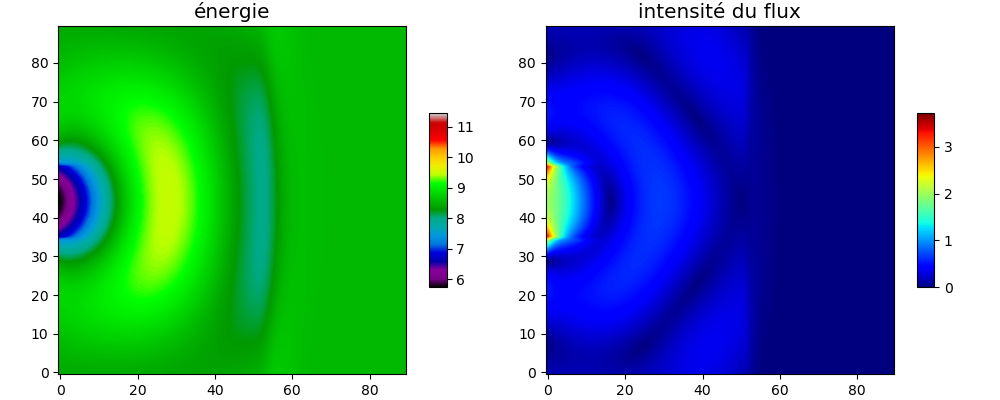

E: (min, max) = (5.73041, 11.442)
F: (min, max) = (0.0, 3.710279608668328)


In [281]:
# Plot l'energie et la norme du flux
fig, ax = plt.subplots(1,2,figsize=(10,4))

e_min, e_max = min_max(e, 3)
print("E: (min, max) =", (e_min, e_max))

img1 = ax[0].imshow(e[0], origin='lower', cmap="nipy_spectral", interpolation='bilinear', vmin=e_min, vmax=e_max)
# img1 = ax[0].imshow(e[0], origin='lower', cmap=cm.coolwarm, interpolation='bilinear', vmin=e_min, vmax=e_max)
fig.colorbar(img1, shrink=0.5, aspect=10, ax=ax[0])
# set_ticks(ax[0])
ax[0].set_title("énergie", size="x-large")

f_min, f_max = min_max(f, 3)
print("F: (min, max) =", (f_min, f_max))

img2 = ax[1].imshow(f[0], origin='lower', cmap="jet", interpolation='bilinear', vmin=f_min, vmax=f_max)
# img2 = ax[1].imshow(f[0], origin='lower', cmap="inferno", interpolation='bilinear', vmin=f_min, vmax=f_max)
fig.colorbar(img2, shrink=0.5, aspect=10, ax=ax[1])
# set_ticks(ax[1])
ax[1].set_title(r"intensité du flux", size="x-large")

plt.tight_layout()

def animate(i):
    img1.set_array(e[i])    
    img2.set_array(f[i])

    return [img1, img2]

anim = FuncAnimation(fig, animate, frames=step_count, repeat=False, interval=10)
plt.show()

In [282]:
# n_seconds = 20
# fps = step_count / n_seconds
# anim.save('video 1.mp4', writer='ffmpeg', fps=fps)

In [283]:
# def plot_borders(ax, df, type="surface", cmap="viridis", stride=10):
#     # make the time axis, x , y
#     t = np.linspace(df["t_0"], df["t_f"], df["step_count"])

#     x = np.linspace(df["x_min"], df["x_max"], df["N"])
#     y = np.linspace(df["y_min"], df["y_max"], df["M"])
    
#     XX, TT = np.meshgrid(x, t)
#     YY, TT = np.meshgrid(y, t)

#     #  make the signals
#     E_u = np.array(df.loc[0, "E_u"])
#     E_d = np.array(df.loc[0, "E_d"])
#     E_l = np.array(df.loc[0, "E_l"])
#     E_r = np.array(df.loc[0, "E_r"])

#     if type=="surface":
#         ax[0, 1].plot_surface(TT, XX, E_u, cmap=cmap, edgecolor='none')
#         ax[2, 1].plot_surface(TT, XX, E_d, cmap=cmap, edgecolor='none')
#         ax[1, 0].plot_surface(TT, YY, E_l, cmap=cmap, edgecolor='none')
#         ax[1, 2].plot_surface(TT, YY, E_r, cmap=cmap, edgecolor='none')
#     elif type=="wireframe":
#         ax[0, 1].plot_wireframe(TT, XX, E_u, rstride=stride, cstride=stride)
#         ax[2, 1].plot_wireframe(TT, XX, E_d, rstride=stride, cstride=stride)
#         ax[1, 0].plot_wireframe(TT, YY, E_l, rstride=stride, cstride=stride)
#         ax[1, 2].plot_wireframe(TT, YY, E_r, rstride=stride, cstride=stride)

#     for i in range(3):
#         for j in range(3):
#             ax[i, j].set_xlabel('t')

#     ax[0, 1].set_ylabel('x')
#     ax[2, 1].set_ylabel('x')
#     ax[1, 0].set_ylabel('y')
#     ax[0, 2].set_ylabel('y')

#     ax[0, 1].set_title('en haut',size="medium", y=1.)
#     ax[2, 1].set_title('en bas',size="medium", y=1.)
#     ax[1, 0].set_title('à gauche',size="medium", y=1.)
#     ax[1, 2].set_title('à droite',size="medium", y=1.)

#     ax[0, 1].view_init(90, 0)
#     ax[2, 1].view_init(90, 0)
#     ax[1, 0].view_init(90, -90)
#     ax[1, 2].view_init(90, -90);

In [288]:
""" Les plots sont traces en 2D """
def plot_borders_2(ax, df, index, cmap="viridis", signal="E"):
    t = np.linspace(df.loc[index, "t_0"], df.loc[index, "t_f"], df.loc[index, "step_count"])

    x = np.linspace(df.loc[index, "x_min"], df.loc[index, "x_max"], df.loc[index, "N"])
    y = np.linspace(df.loc[index, "y_min"], df.loc[index, "y_max"], df.loc[index, "M"])
    
    XX, TT = np.meshgrid(x, t)
    YY, TT = np.meshgrid(y, t)

    #  make the signals
    up = np.stack(df.loc[index, signal+"_u"])
    down = np.stack(df.loc[index, signal+"_d"])
    left = np.stack(df.loc[index, signal+"_l"])
    right = np.stack(df.loc[index, signal+"_r"])

    print("(min, max) pour les ondes")
    print(" -", signal+" up:", min_max(up, 2))
    print(" -", signal+" down:", min_max(down, 2))
    print(" -", signal+" left:", min_max(left, 2))
    print(" -", signal+" right:", min_max(right, 2))
    print()
    
    ax[0, 1].imshow(up, aspect='auto', origin="lower", vmin=8.16, vmax=8.99)
    ax[2, 1].imshow(down, aspect='auto', origin="lower", vmin=8.15, vmax=9.00)
    ax[1, 0].imshow(left.T, aspect='auto', origin="lower", vmin=5.73041, vmax=11.442)
    ax[1, 2].imshow(right.T, aspect='auto', origin="lower", vmin=8.57, vmax=8.58)

    ax[1, 0].set_ylabel('y')
    ax[0, 2].set_ylabel('y')

    ax[0, 1].set_xlabel('x')
    ax[2, 1].set_xlabel('x')

    ax[0, 1].set_ylabel('t')
    ax[2, 1].set_ylabel('t')
    ax[1, 0].set_xlabel('t')
    ax[0, 2].set_xlabel('t')

    ax[0, 1].set_title(signal+' en haut',size="medium", y=0.99)
    ax[2, 1].set_title(signal+' en bas',size="medium", y=0.99)
    ax[1, 0].set_title(signal+' à gauche',size="medium", y=0.99)
    ax[1, 2].set_title(signal+' à droite',size="medium", y=0.99)

<IPython.core.display.Javascript object>


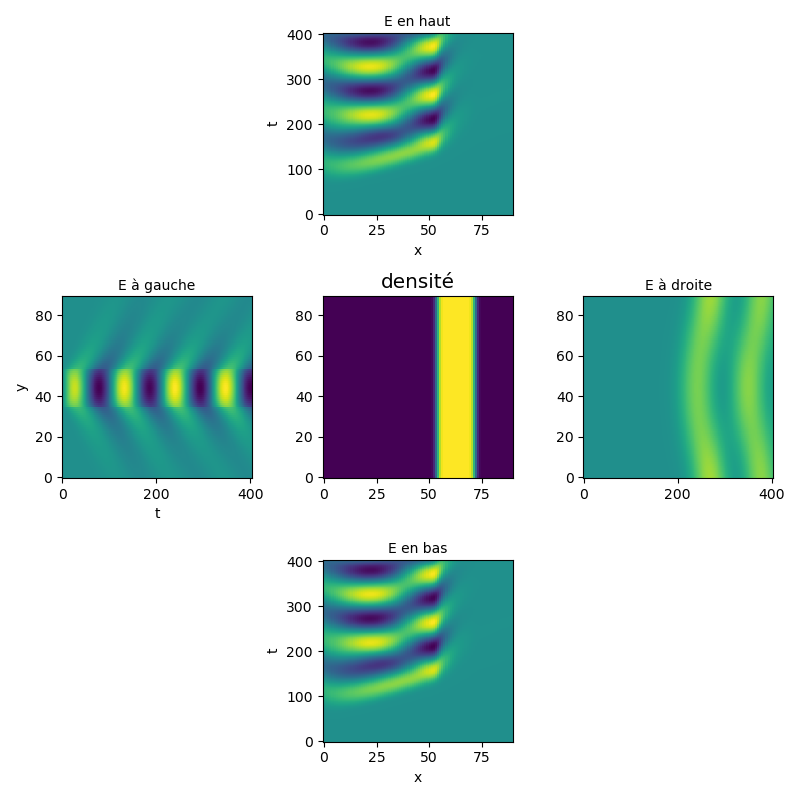

(min, max) pour les ondes
 - E up: (8.16591, 8.9844)
 - E down: (8.15442, 8.9955)
 - E left: (5.73041, 11.442)
 - E right: (8.575, 8.57858)

(min, max) rho = 0.1 10.0


In [289]:
fig,ax = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
for i in range(3):
    for j in range(3):
        ax[i, j].remove()
#         if (i == 1 or j == 1) and i != j:
        if (i == 1 or j == 1):
            # ax[i, j] = fig.add_subplot(3, 3, (j+1) + (i)*3, projection='3d')
            ax[i, j] = fig.add_subplot(3, 3, (j+1) + (i)*3)


# plot_borders(ax, df_simu, type="surface", cmap="viridis")
plot_borders_2(ax, df_simu, 0, cmap="viridis", signal="E")
plot_density(ax[1, 1], 0, cb=False)

# df_simu_copy = pd.read_csv("../../data/df_simu - Copy.csv", converters=converters)
# plot_borders(ax, df_simu_copy, type="surface", cmap="viridis")
# plot_borders(ax, df_simu_copy, type="surface", cmap=cm.coolwarm)
# plot_borders(ax, df_simu_copy, type="wireframe", stride=2)

# fig.colorbar(img, shrink=2, aspect=20, orientation="horizontal")
plt.suptitle("observation de l'évolution de l'énergie sur les bords", size="xx-large", y=1.05)
plt.tight_layout();